In [1]:
import pandas as pd
from ast import literal_eval
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import time
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def to_literal_eval(item):
    lit_eval = np.nan
    try:
        lit_eval= literal_eval(str(item))
    except:
        pass
    return lit_eval

def get_dictionary_val(item,key):
    val = item
    try:
        val = item[key]
    except:
        pass
    return val

def epoch_to_local_pd_timestamp(epoch,format ='%Y-%m-%d %H:%M:%S'): 
    try:
        return pd.to_datetime(time.strftime(format, time.localtime(int(epoch))))
    except:
        return np.nan

In [3]:
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 1000)

In [5]:
listings = pd.read_csv("listings_feb_8_2019.csv")

/Users/omar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,2,11,12,16,22,23,27,34,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
listings.drop_duplicates(subset=['id'],inplace=True)
listings.shape

(150963, 50)

In [7]:
listings.location = listings.location.map(to_literal_eval)
listings.user = listings.user.map(to_literal_eval)

In [8]:
listings['updated'] = listings.refresh.map(epoch_to_local_pd_timestamp)
listings['created'] = listings.create_time.map(epoch_to_local_pd_timestamp)
listings['user_name']=listings.user.map(lambda x: get_dictionary_val(x,'name'))
listings['user_contact']=listings.user.map(lambda x: get_dictionary_val(x,'phone'))
listings['lat']= listings.location.map(lambda x: get_dictionary_val(x,'lat'))
listings['lng']= listings.location.map(lambda x: get_dictionary_val(x,'lng'))
listings.dropna(subset=['id','updated','lat'], inplace=True)

In [9]:
listings.describe()

,ac,age,apts,area,backyard,basement,beds,car_entrance,category,driver,duplex,extra_unit,family_section,fb,fl,furnished,id,ketchen,lift,livings,maid,meter_price,playground,pool,premium,price,rent_period,rooms,stairs,status,stores,street_direction,street_width,tent,trees,type,user_id,vb,wc,wells,user_contact,lat,lng
count,67924.000000,99873.000000,80755.000000,1.298110e+05,75780.000000,73275.000000,103561.000000,102030.000000,150961.000000,75772.000000,73278.000000,100319.000000,48716.000000,48117.000000,36490.000000,113164.000000,1.509610e+05,103530.000000,97918.000000,105683.000000,75775.000000,7.356900e+04,48114.000000,76852.000000,150961.0,1.509610e+05,68952.000000,56007.000000,73311.000000,10688.0,53953.000000,127252.000000,124930.000000,79952.000000,45196.000000,80200.000000,150961.000000,48115.000000,105683.000000,45196.000000,1.509610e+05,150961.000000,150961.000000
mean,0.132030,4.615862,2.307325,4.390806e+04,0.441462,0.038390,2.992294,0.432853,4.671041,0.327377,0.115956,0.270288,0.067678,0.025854,1.571581,0.079981,1.157611e+06,0.593702,0.214465,1.248299,0.371904,3.188897e+03,0.034335,0.119802,0.0,3.625240e+07,1.128162,3.541486,0.376424,0.0,0.515949,3.264892,22.559417,0.265809,17.014537,1.083167,345589.332954,0.024400,2.629827,0.238804,5.424899e+08,24.046925,44.762871
std,0.338526,8.022714,5.169240,8.438327e+06,0.496565,0.192136,2.086966,0.495473,4.352125,0.469259,0.320174,0.444111,0.251195,0.158700,1.505701,0.271265,2.576347e+05,0.491144,0.410453,1.209290,0.483316,4.123802e+05,0.182090,0.324732,0.0,5.329579e+09,1.352057,15.162011,0.484492,0.0,2.536677,2.380433,15.993840,0.441766,1822.726616,0.988640,196986.378882,0.154289,1.929153,39.103163,2.613374e+07,2.092263,3.737209
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.760000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000e+08,16.504031,27.438777
25%,0.000000,0.000000,0.000000,3.190000e+02,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.087894e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,5.000000e+04,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,162215.000000,0.000000,1.000000,0.000000,5.300384e+08,21.833765,39.959328
50%,0.000000,0.000000,0.000000,5.000000e+02,0.000000,0.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.246443e+06,1.000000,0.000000,1.000000,0.000000,2.160000e+02,0.000000,0.000000,0.0,6.800000e+05,0.000000,0.000000,0.000000,0.0,0.000000,3.000000,20.000000,0.000000,0.000000,1.000000,378653.000000,0.000000,3.000000,0.000000,5.480055e+08,24.689892,46.595879
75%,0.000000,6.000000,2.000000,8.500000e+02,1.000000,0.000000,5.000000,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.332068e+06,1.000000,0.000000,2.000000,1.000000,1.388000e+03,0.000000,0.000000,0.0,1.500000e+06,3.000000,1.000000,1.000000,0.0,0.000000,4.000000,25.000000,1.000000,0.000000,1.000000,496077.000000,0.000000,5.000000,0.000000,5.578490e+08,24.859254,46.771030
max,1.000000,36.000000,39.000000,2.147484e+09,1.000000,1.000000,7.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.388836e+06,1.000000,1.000000,5.000000,1.000000,1.111111e+08,1.000000,1.000000,0.0,1.000000e+12,3.000000,1073.000000,1.000000,0.0,50.000000,10.000000,100.000000,1.000000,380000.000000,4.000000,674002.000000,1.000000,5.000000,8300.000000,5.999997e+08,41.017729,55.113263


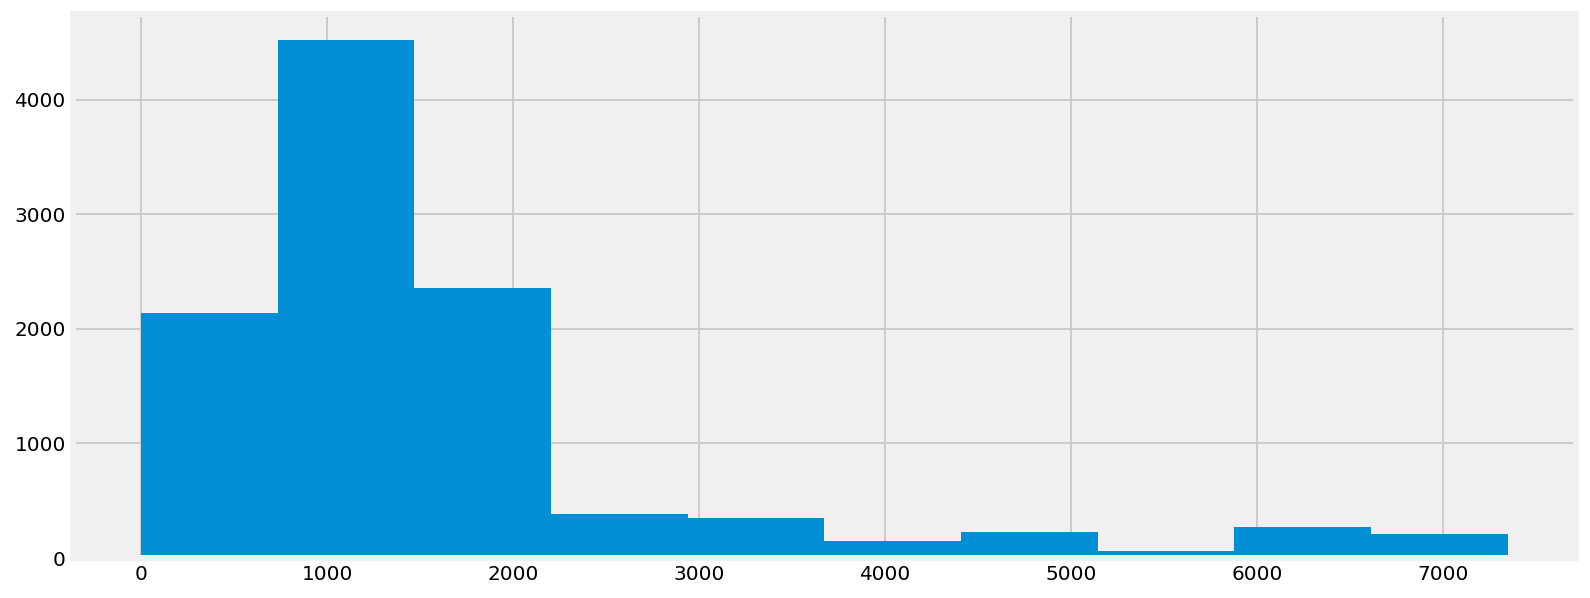

In [10]:
listings.price[listings.price<7500].hist(figsize=(12,5),bins=10);


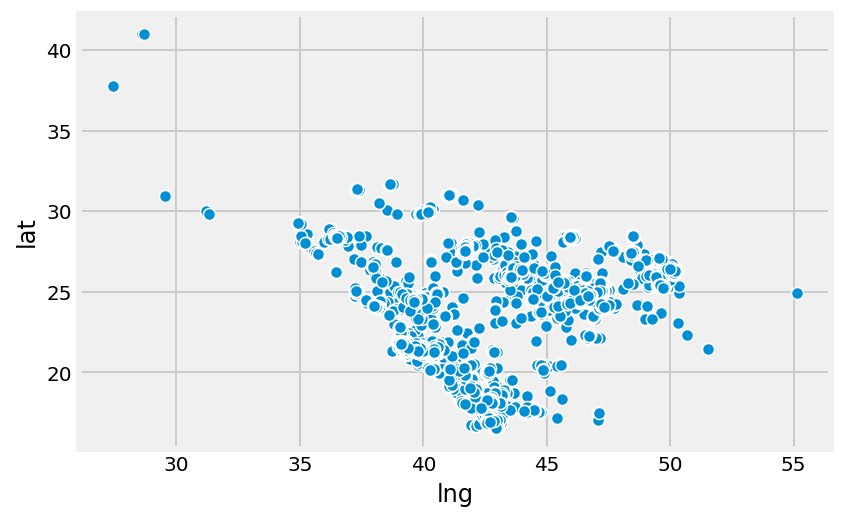

In [11]:
sns.scatterplot(listings.lng,listings.lat);

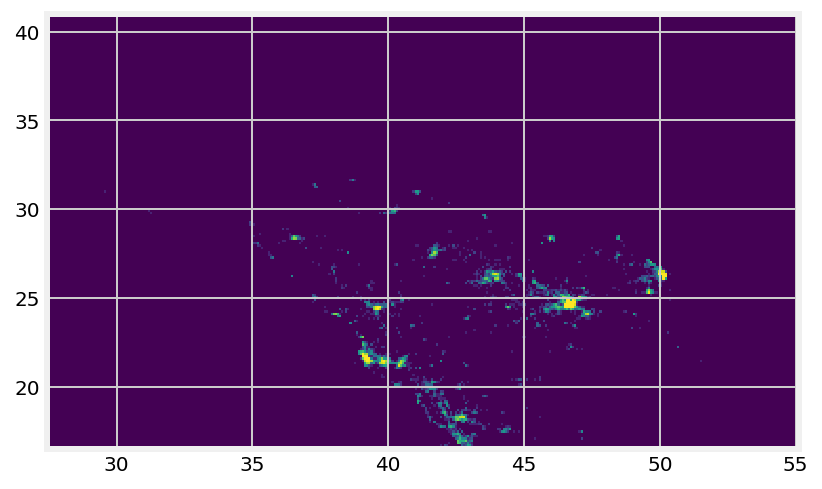

In [12]:
import mpl_scatter_density
import matplotlib.pyplot as plt

# Make the norm object to define the image stretch
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=1000, stretch=LogStretch())

N = 10000000
x = listings.lng
y = listings.lat

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
ax.scatter_density(x, y, norm=norm)
#ax.set_xlim(-5, 10)
#ax.set_ylim(-5, 10)
fig.savefig('gaussian_log.png')

In [13]:
listings.describe()

,ac,age,apts,area,backyard,basement,beds,car_entrance,category,driver,duplex,extra_unit,family_section,fb,fl,furnished,id,ketchen,lift,livings,maid,meter_price,playground,pool,premium,price,rent_period,rooms,stairs,status,stores,street_direction,street_width,tent,trees,type,user_id,vb,wc,wells,user_contact,lat,lng
count,67924.000000,99873.000000,80755.000000,1.298110e+05,75780.000000,73275.000000,103561.000000,102030.000000,150961.000000,75772.000000,73278.000000,100319.000000,48716.000000,48117.000000,36490.000000,113164.000000,1.509610e+05,103530.000000,97918.000000,105683.000000,75775.000000,7.356900e+04,48114.000000,76852.000000,150961.0,1.509610e+05,68952.000000,56007.000000,73311.000000,10688.0,53953.000000,127252.000000,124930.000000,79952.000000,45196.000000,80200.000000,150961.000000,48115.000000,105683.000000,45196.000000,1.509610e+05,150961.000000,150961.000000
mean,0.132030,4.615862,2.307325,4.390806e+04,0.441462,0.038390,2.992294,0.432853,4.671041,0.327377,0.115956,0.270288,0.067678,0.025854,1.571581,0.079981,1.157611e+06,0.593702,0.214465,1.248299,0.371904,3.188897e+03,0.034335,0.119802,0.0,3.625240e+07,1.128162,3.541486,0.376424,0.0,0.515949,3.264892,22.559417,0.265809,17.014537,1.083167,345589.332954,0.024400,2.629827,0.238804,5.424899e+08,24.046925,44.762871
std,0.338526,8.022714,5.169240,8.438327e+06,0.496565,0.192136,2.086966,0.495473,4.352125,0.469259,0.320174,0.444111,0.251195,0.158700,1.505701,0.271265,2.576347e+05,0.491144,0.410453,1.209290,0.483316,4.123802e+05,0.182090,0.324732,0.0,5.329579e+09,1.352057,15.162011,0.484492,0.0,2.536677,2.380433,15.993840,0.441766,1822.726616,0.988640,196986.378882,0.154289,1.929153,39.103163,2.613374e+07,2.092263,3.737209
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.760000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000e+08,16.504031,27.438777
25%,0.000000,0.000000,0.000000,3.190000e+02,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.087894e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,5.000000e+04,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,162215.000000,0.000000,1.000000,0.000000,5.300384e+08,21.833765,39.959328
50%,0.000000,0.000000,0.000000,5.000000e+02,0.000000,0.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.246443e+06,1.000000,0.000000,1.000000,0.000000,2.160000e+02,0.000000,0.000000,0.0,6.800000e+05,0.000000,0.000000,0.000000,0.0,0.000000,3.000000,20.000000,0.000000,0.000000,1.000000,378653.000000,0.000000,3.000000,0.000000,5.480055e+08,24.689892,46.595879
75%,0.000000,6.000000,2.000000,8.500000e+02,1.000000,0.000000,5.000000,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.332068e+06,1.000000,0.000000,2.000000,1.000000,1.388000e+03,0.000000,0.000000,0.0,1.500000e+06,3.000000,1.000000,1.000000,0.0,0.000000,4.000000,25.000000,1.000000,0.000000,1.000000,496077.000000,0.000000,5.000000,0.000000,5.578490e+08,24.859254,46.771030
max,1.000000,36.000000,39.000000,2.147484e+09,1.000000,1.000000,7.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.388836e+06,1.000000,1.000000,5.000000,1.000000,1.111111e+08,1.000000,1.000000,0.0,1.000000e+12,3.000000,1073.000000,1.000000,0.0,50.000000,10.000000,100.000000,1.000000,380000.000000,4.000000,674002.000000,1.000000,5.000000,8300.000000,5.999997e+08,41.017729,55.113263


In [15]:
listings.head()

,Unnamed: 0,ac,address,age,apts,area,backyard,basement,beds,car_entrance,category,content,create_time,driver,duplex,extra_unit,family,family_section,fb,fl,furnished,id,imgs,imgs_desc,ketchen,lift,livings,location,maid,meter_price,playground,pool,premium,price,refresh,rent_period,rooms,stairs,status,stores,street_direction,street_width,tent,trees,type,user,user_id,vb,wc,wells,updated,created,user_name,user_contact,lat,lng
0,0,1.0,شارع الغاط ، حي ظهرة لبن ، الرياض,0.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,شقق عزاب ( فاخره. _ سنوى وشهر. تبدا 1...,1.54376e+09,NaN,NaN,0.0,0.0,NaN,NaN,2.0,0.0,1274304.0,"['500520840_1543757014073.jpg', '500520840_154...","['', '', '', '', '', '', '', '', '', '', '', '...",1.0,1.0,1.0,"{'lat': 24.636696, 'lng': 46.585234}",NaN,NaN,NaN,NaN,0.0,18000.0,1549631283,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'img': None, 'name': 'أبو نور', 'phone': 5005...",436477.0,NaN,1.0,NaN,2019-02-08 16:08:03,2018-12-02 16:23:44,أبو نور,500520840.0,24.636696,46.585234
1,1,0.0,شارع الطائف - حي ظهرة لبن ، الرياض,2.0,NaN,NaN,NaN,NaN,3.0,0.0,1.0,شقه فى فلا\nتتكومن_\n3 غرف نوم + مجلس رجال + م...,1.53829e+09,NaN,NaN,0.0,1.0,NaN,NaN,2.0,0.0,1178047.0,"['500520840_1538292985402.jpg', '500520840_153...","['', '', '', '', '', '', '', '', '', '', '']",0.0,0.0,1.0,"{'lat': 24.647532, 'lng': 46.55299}",NaN,NaN,NaN,NaN,0.0,1600.0,1549631279,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'img': None, 'name': 'أبو نور', 'phone': 5005...",436477.0,NaN,2.0,NaN,2019-02-08 16:07:59,2018-09-30 10:36:31,أبو نور,500520840.0,24.647532,46.552990
2,2,0.0,حي الزمرد ، جدة,0.0,NaN,NaN,NaN,NaN,3.0,0.0,1.0,شقة جديدة في حي الزمرد ثلاث غرف وصالة في موقع ...,1.54832e+09,NaN,NaN,0.0,1.0,NaN,NaN,1.0,0.0,1362348.0,"['549425494_1548316903931.jpg', '549425494_154...","['', '', '', '', '', '', '']",0.0,1.0,1.0,"{'lat': 21.808758, 'lng': 39.05518}",NaN,NaN,NaN,NaN,0.0,12000.0,1549631278,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'img': None, 'name': 'وليد محمد', 'phone': 54...",660736.0,NaN,2.0,NaN,2019-02-08 16:07:58,2019-01-24 11:06:25,وليد محمد,549425494.0,21.808758,39.055180
3,3,0.0,شارع سلوى ، حي الازدهار ، الرياض,20.0,NaN,NaN,NaN,NaN,4.0,0.0,1.0,تتكون الشقه من أربع غرف وصاله ومطبخ وحمامين\nم...,1.54875e+09,NaN,NaN,0.0,1.0,NaN,NaN,1.0,0.0,1370990.0,"['555470021_1548751020901.jpg', '555470021_154...","['', '', '', '', '', '', '', '']",1.0,0.0,1.0,"{'lat': 24.776011, 'lng': 46.721699}",NaN,NaN,NaN,NaN,0.0,25000.0,1549631277,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'img': '555470021_1524140500015.jpg', 'name':...",298445.0,NaN,2.0,NaN,2019-02-08 16:07:57,2019-01-29 11:39:48,العشماوية للعقارات,555470021.0,24.776011,46.721699
4,4,0.0,حي الياقوت ، جدة,1.0,NaN,NaN,NaN,NaN,4.0,0.0,1.0,شقة نظيفة الايجار شهري 1600 ريال الشهر الموقع ...,1.54834e+09,NaN,NaN,0.0,1.0,NaN,NaN,1.0,0.0,1362829.0,"['549425494_1548336119418.jpg', '549425494_154...","['', '', '', '', '', '', '', '']",0.0,0.0,2.0,"{'lat': 21.780806, 'lng': 39.096348}",NaN,NaN,NaN,NaN,0.0,1600.0,1549631275,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'img': None, 'name': 'وليد محمد', 'phone': 54...",660736.0,NaN,2.0,NaN,2019-02-08 16:07:55,2019-01-24 16:25:33,وليد محمد,549425494.0,21.780806,39.096348


In [16]:
!mv listings_feb_8_2019.csv listings_feb_8_2019_pre.csv

In [17]:
listings.to_csv('listings_feb_8_2019.csv',index=False)

In [18]:
listings = pd.read_csv("listings_feb_8_2019.csv")

In [19]:
listings.head()

,Unnamed: 0,ac,address,age,apts,area,backyard,basement,beds,car_entrance,category,content,create_time,driver,duplex,extra_unit,family,family_section,fb,fl,furnished,id,imgs,imgs_desc,ketchen,lift,livings,location,maid,meter_price,playground,pool,premium,price,refresh,rent_period,rooms,stairs,status,stores,street_direction,street_width,tent,trees,type,user,user_id,vb,wc,wells,updated,created,user_name,user_contact,lat,lng
0,0,1.0,شارع الغاط ، حي ظهرة لبن ، الرياض,0.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,شقق عزاب ( فاخره. _ سنوى وشهر. تبدا 1...,1.543757e+09,NaN,NaN,0.0,0.0,NaN,NaN,2.0,0.0,1274304.0,"['500520840_1543757014073.jpg', '500520840_154...","['', '', '', '', '', '', '', '', '', '', '', '...",1.0,1.0,1.0,"{'lat': 24.636696, 'lng': 46.585234}",NaN,NaN,NaN,NaN,0.0,18000.0,1549631283,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'img': None, 'name': 'أبو نور', 'phone': 5005...",436477.0,NaN,1.0,NaN,2019-02-08 16:08:03,2018-12-02 16:23:44,أبو نور,500520840.0,24.636696,46.585234
1,1,0.0,شارع الطائف - حي ظهرة لبن ، الرياض,2.0,NaN,NaN,NaN,NaN,3.0,0.0,1.0,شقه فى فلا\nتتكومن_\n3 غرف نوم + مجلس رجال + م...,1.538293e+09,NaN,NaN,0.0,1.0,NaN,NaN,2.0,0.0,1178047.0,"['500520840_1538292985402.jpg', '500520840_153...","['', '', '', '', '', '', '', '', '', '', '']",0.0,0.0,1.0,"{'lat': 24.647532, 'lng': 46.55299}",NaN,NaN,NaN,NaN,0.0,1600.0,1549631279,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'img': None, 'name': 'أبو نور', 'phone': 5005...",436477.0,NaN,2.0,NaN,2019-02-08 16:07:59,2018-09-30 10:36:31,أبو نور,500520840.0,24.647532,46.552990
2,2,0.0,حي الزمرد ، جدة,0.0,NaN,NaN,NaN,NaN,3.0,0.0,1.0,شقة جديدة في حي الزمرد ثلاث غرف وصالة في موقع ...,1.548317e+09,NaN,NaN,0.0,1.0,NaN,NaN,1.0,0.0,1362348.0,"['549425494_1548316903931.jpg', '549425494_154...","['', '', '', '', '', '', '']",0.0,1.0,1.0,"{'lat': 21.808758, 'lng': 39.05518}",NaN,NaN,NaN,NaN,0.0,12000.0,1549631278,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'img': None, 'name': 'وليد محمد', 'phone': 54...",660736.0,NaN,2.0,NaN,2019-02-08 16:07:58,2019-01-24 11:06:25,وليد محمد,549425494.0,21.808758,39.055180
3,3,0.0,شارع سلوى ، حي الازدهار ، الرياض,20.0,NaN,NaN,NaN,NaN,4.0,0.0,1.0,تتكون الشقه من أربع غرف وصاله ومطبخ وحمامين\nم...,1.548751e+09,NaN,NaN,0.0,1.0,NaN,NaN,1.0,0.0,1370990.0,"['555470021_1548751020901.jpg', '555470021_154...","['', '', '', '', '', '', '', '']",1.0,0.0,1.0,"{'lat': 24.776011, 'lng': 46.721699}",NaN,NaN,NaN,NaN,0.0,25000.0,1549631277,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'img': '555470021_1524140500015.jpg', 'name':...",298445.0,NaN,2.0,NaN,2019-02-08 16:07:57,2019-01-29 11:39:48,العشماوية للعقارات,555470021.0,24.776011,46.721699
4,4,0.0,حي الياقوت ، جدة,1.0,NaN,NaN,NaN,NaN,4.0,0.0,1.0,شقة نظيفة الايجار شهري 1600 ريال الشهر الموقع ...,1.548336e+09,NaN,NaN,0.0,1.0,NaN,NaN,1.0,0.0,1362829.0,"['549425494_1548336119418.jpg', '549425494_154...","['', '', '', '', '', '', '', '']",0.0,0.0,2.0,"{'lat': 21.780806, 'lng': 39.096348}",NaN,NaN,NaN,NaN,0.0,1600.0,1549631275,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'img': None, 'name': 'وليد محمد', 'phone': 54...",660736.0,NaN,2.0,NaN,2019-02-08 16:07:55,2019-01-24 16:25:33,وليد محمد,549425494.0,21.780806,39.096348
